<a href="https://www.kaggle.com/code/zmkalila/iris-dataset-practice?scriptVersionId=200138200" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Iris Dataset: EDA, Data Visualization, and Classification

I make this notebook based on the codes in this YouTube lesson:  
https://youtu.be/Op3019SFYzI?si=DQ4VwN5I5t8Vk6jX (thus the credit goes to the video-maker).

# Exploratory Data Analysis (EDA)

## Import modules

In [1]:
import pandas as pd
import seaborn as sns

Import this module below so when `sns.get_dataset_names()` cell is run, there won't be any warnings.

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [4]:
df = sns.load_dataset('iris') # load dataset
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Identify the shape of the dataset

In [5]:
df.shape # dataset dimension (number_of_rows, number_of_columns)

(150, 5)

## Get the list of all the column names

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Identify data types for each column

In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Get basic dataset information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Identify missing values

In [9]:
df.isna().values.any()
# can also be written as: df.isnull().values.any()

False

## Identify duplicated entries/rows

In [10]:
df[df.duplicated(keep=False)] # to display all rows that are duplicated

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [11]:
df.duplicated().value_counts()

False    149
True       1
Name: count, dtype: int64

## Drop duplicated entries/rows

In [12]:
df.drop_duplicates(inplace=True)
df.shape

(149, 5)

## Describe the dataset

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Note: all the numerical data above is in centimeter (cm) unit.

## Correlation matrix

In [14]:
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.118129,0.873738,0.820620
sepal_width,-0.118129,1.000000,-0.426028,-0.362894
petal_length,0.873738,-0.426028,1.000000,0.962772
petal_width,0.820620,-0.362894,0.962772,1.000000


The numbers above shows how one variable correlates with the other variables.  
- **Positive value**: shows that the two variables correlate with each other.<br>(the closer the value to 1, the stronger the correlation is)
- **Negative value**: shows that the two variables have weak to no correlation.

# Data Visualization

## Import modules

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # to tell Python that we want the visualization to be in Seaborn style

## Heatmap

<Axes: >

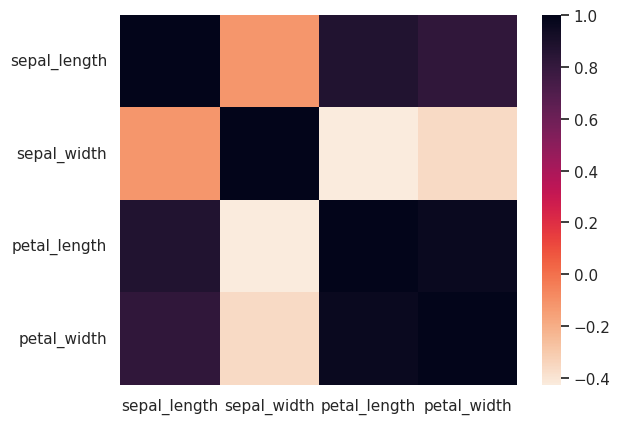

In [16]:
sns.heatmap(data=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(),
           cmap='rocket_r')

## Bar Plot

In [17]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

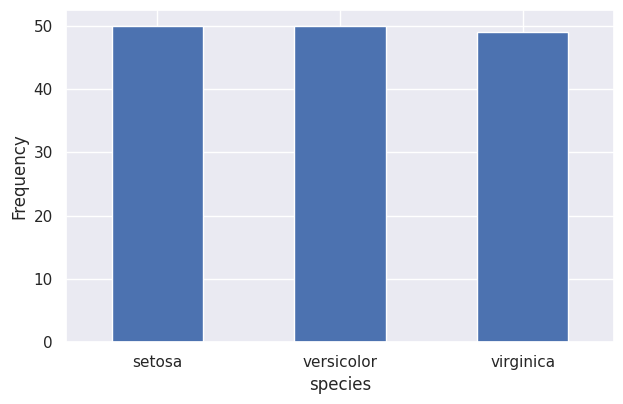

In [18]:
df['species'].value_counts().plot.bar()
plt.ylabel('Frequency')
plt.tight_layout()
plt.xticks(rotation=0)

plt.show()

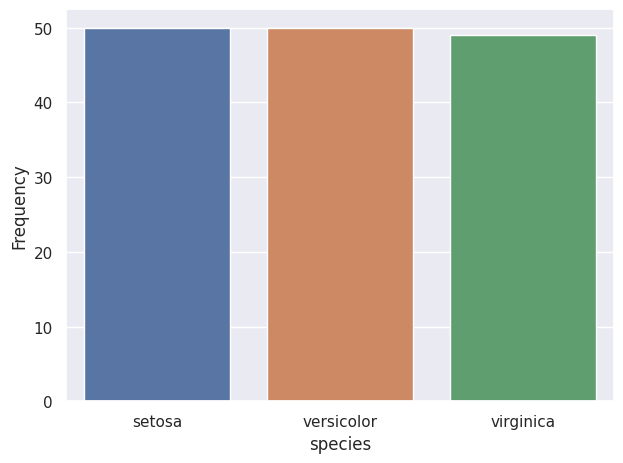

In [19]:
sns.countplot(x='species', data=df)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Pie Chart

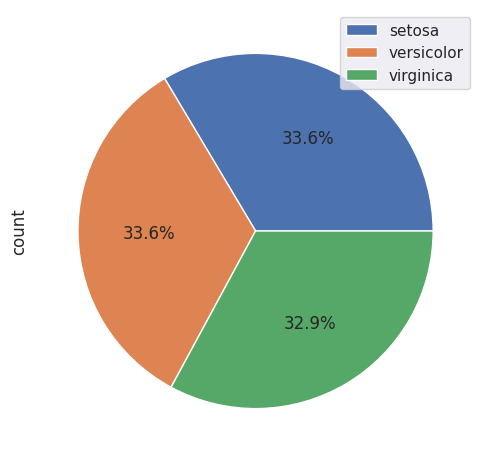

In [20]:
df['species'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

## Line Plot

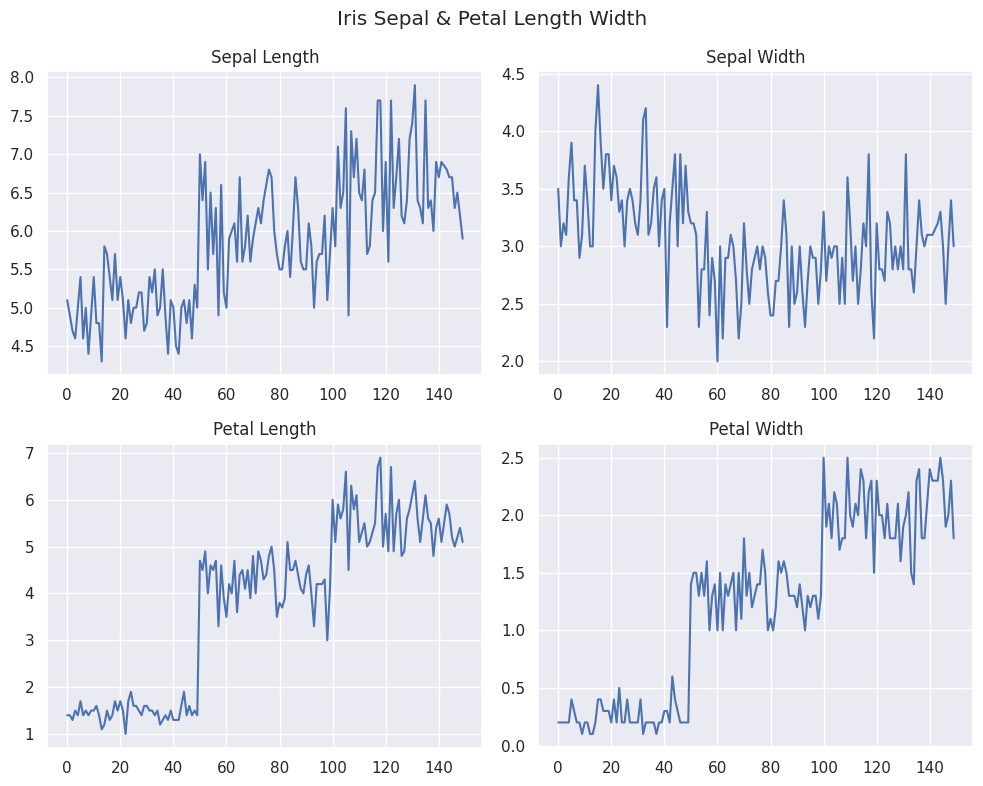

In [21]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
plt.suptitle('Iris Sepal & Petal Length Width')

df['sepal_length'].plot.line(ax=ax[0][0])
ax[0][0].set_title('Sepal Length')

df['sepal_width'].plot.line(ax=ax[0][1])
ax[0][1].set_title('Sepal Width')

df.petal_length.plot.line(ax=ax[1][0])
ax[1][0].set_title('Petal Length')

df.petal_width.plot.line(ax=ax[1][1])
ax[1][1].set_title('Petal Width')

plt.tight_layout()
plt.show()

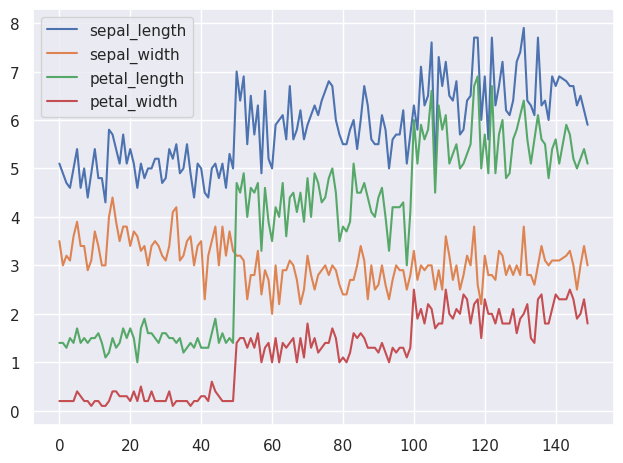

In [22]:
df.plot()
plt.tight_layout()
plt.show()

## Histogram

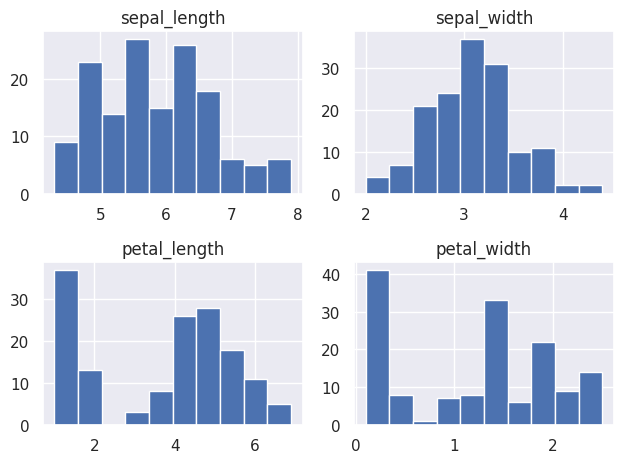

In [23]:
df.hist(bins=10)
plt.tight_layout()

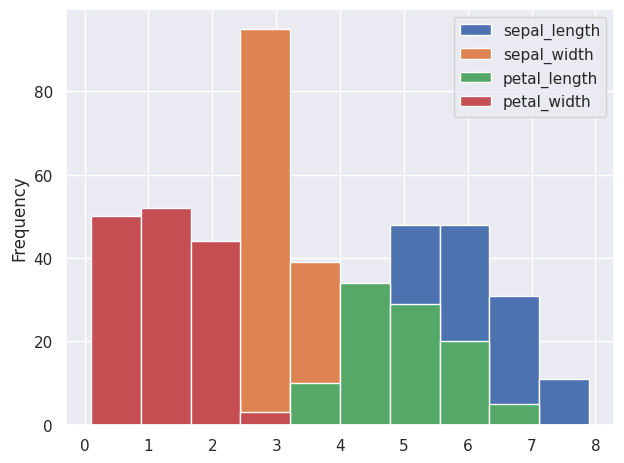

In [24]:
df.plot.hist(bins=10)
plt.tight_layout()

## Boxplot

<Axes: >

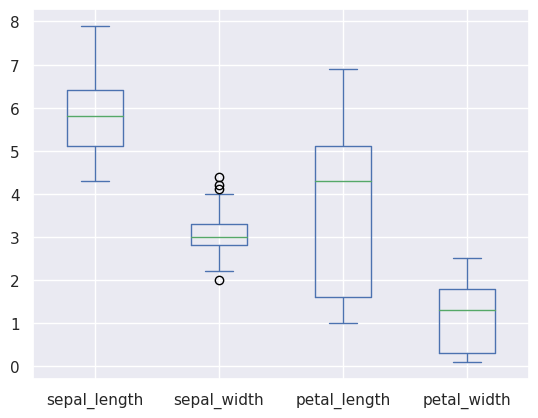

In [25]:
df.plot.box()

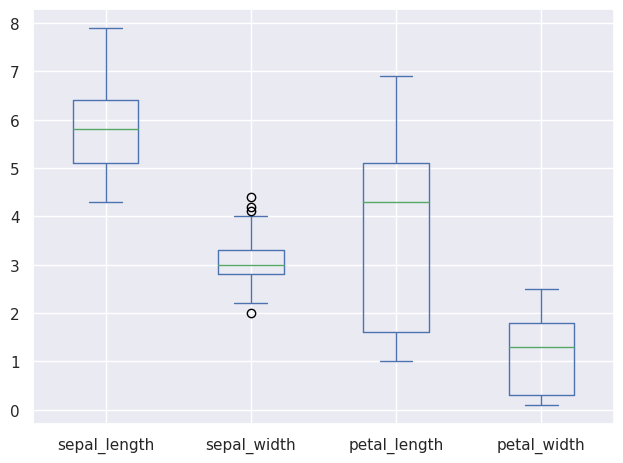

In [26]:
df.plot.box()
plt.tight_layout()

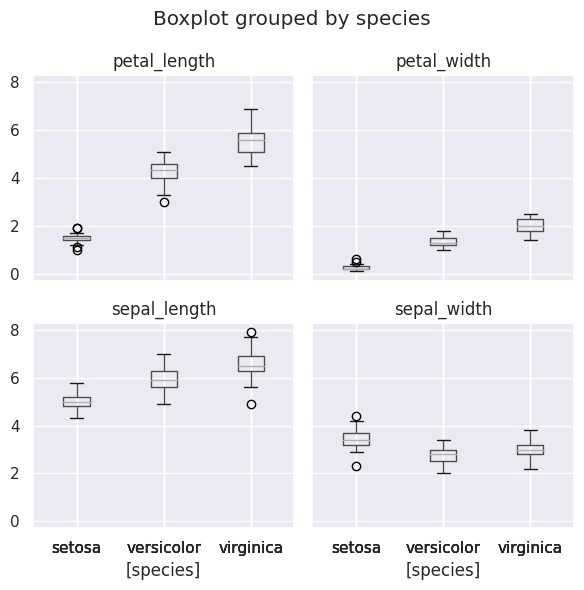

In [27]:
df.boxplot(by='species', figsize=(6,6))
plt.tight_layout()

## Scatter Plot

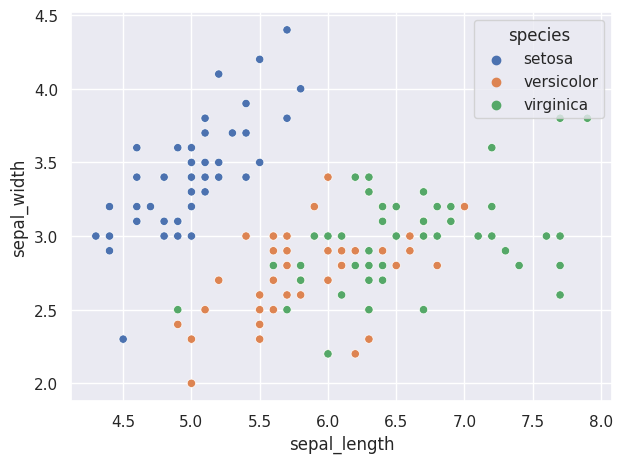

In [28]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species')
plt.tight_layout()

## Pair Plot

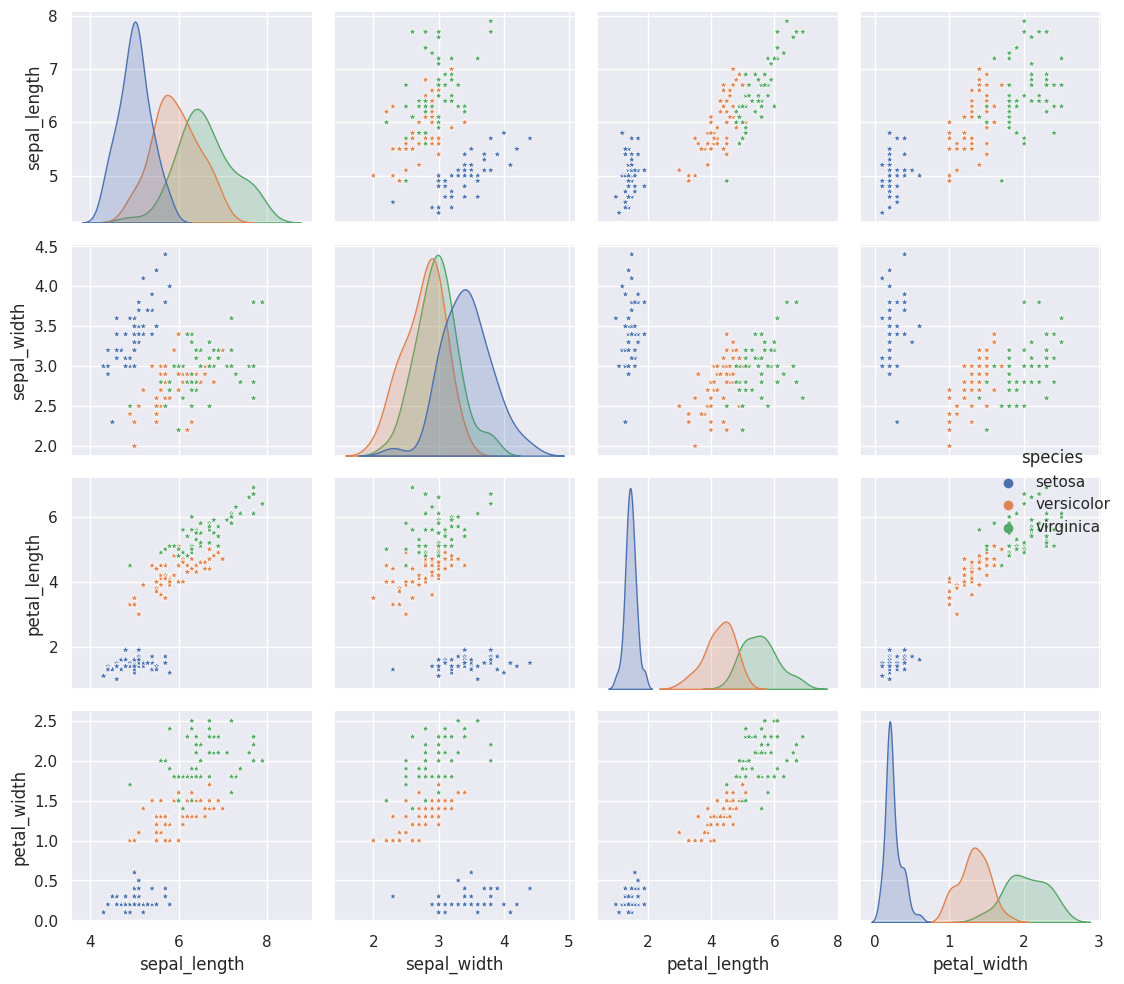

In [29]:
sns.pairplot(df, hue='species', markers='*')
plt.tight_layout()

## Violin Plot

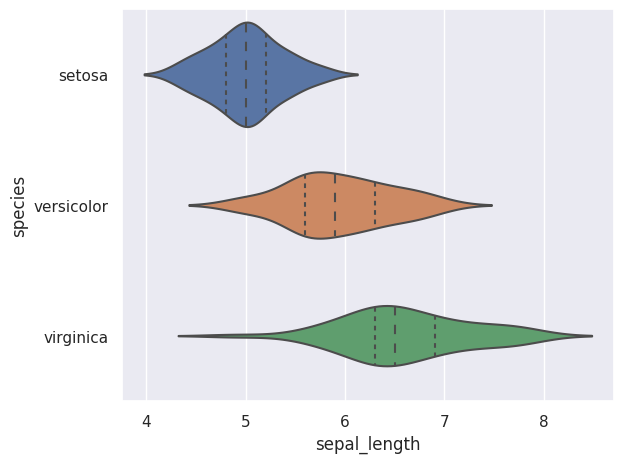

In [30]:
sns.violinplot(data=df, y='species', x='sepal_length', inner='quartile')
plt.tight_layout()

# Machine Learning: Classification Model

## Import modules
Scikit-Learn

In [31]:
from sklearn.model_selection import train_test_split # to split dataset into 2 parts: training & testing set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # to evaluate performance of the model

## Dataset: Features & Class Label

**'Features'** is the input for the Machine Learning model,
whereas **'Class Label'**, as the name suggests, is the output or the labels used for the classification results.

These 'features' are what the machine will learn to train itself to recognize some pattern in it so that the machine will be able to classify objects into the existing categories, which is the 'Class Labels'.

In [32]:
# assign features to variable X
# only the columns with numerical data becomes the features, thus 'species' column is dropped

X = df.drop(columns='species')
X.head() # to show the first 5 rows

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
# the 'species' column acts as the class label (target)
# assign label (target) to variable y

y = df['species']
y.head().to_frame() # to show the first 5 rows in the form of dataframe

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


## Split the dataset into a training set and testing set

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

`test_size` is the proportion of the testing dataset.  
0.4 means 40% testing set and thus the rest (60%) is training set.

`random_state` is the number of the randomization replication.

In [35]:
print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset')
print(X_test.shape)
print(y_test.shape)

training dataset
(89, 4)
(89,)

testing dataset
(60, 4)
(60,)


## K Nearest Neighbors

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
k_range = list(range(1,26))
scores = [] # empty list

for k in k_range:

    # configure algorithm by using KNeighborsClassifier function and determine the neighbors number
    model_knn = KNeighborsClassifier(n_neighbors=k) 

    # train model/classifier by using the method .fit() then apply it to X_train and y_train
    model_knn.fit(X_train, y_train)

    # tell the model to make prediction based on the X_test dataset and assign it to variable y_pred
    y_pred = model_knn.predict(X_test)

    # lastly see the model's performance based on the accuracy score of the actual performance (y_test) and the trained prediction process (y_pred)
    scores.append(accuracy_score(y_test, y_pred))

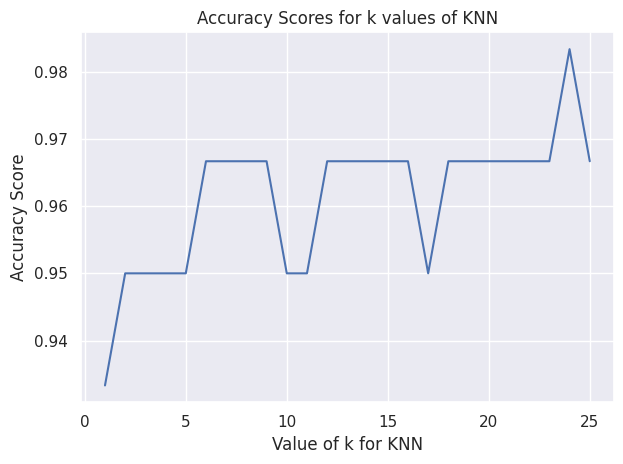

In [38]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for k values of KNN')
plt.tight_layout()

As we can see above, the accuracy score shows an increasing trend.

In [39]:
# model_knn = KNeighborsClassifier(n_neighbors=3)
# model_knn.fit(X_train, y_train)
# y_pred = model_knn.predict(X_test)

### Accuracy Score

In [40]:
print(accuracy_score(y_test, y_pred)) # to evaluate the accuracy of the classification model

0.9666666666666667


### Confusion Matrix

In [41]:
print(confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 20  2]
 [ 0  0 19]]


### Classification Report

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.91      0.95        22
   virginica       0.90      1.00      0.95        19

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)

## Support Vector Classifier

In [45]:
from sklearn.svm import SVC

In [46]:
model_svc = SVC(gamma='scale')
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)

## Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

## Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

## Accuracy comparison of various classifier models

In [51]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []

for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

print(accuracy_scores)

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.95]


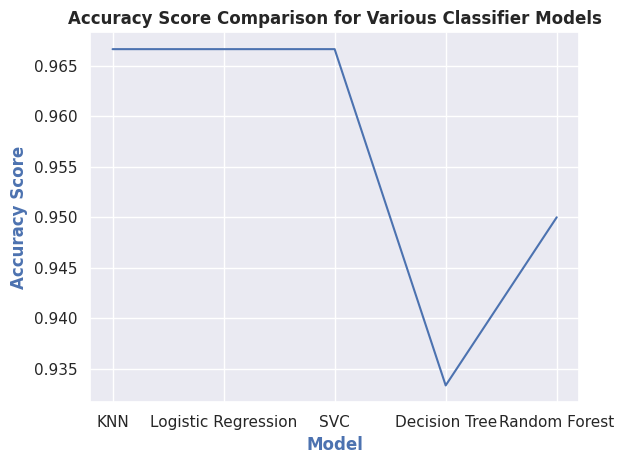

In [52]:
plt.plot(['KNN', 'Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest'], accuracy_scores)
plt.title('Accuracy Score Comparison for Various Classifier Models', fontweight='bold')
plt.xlabel('Model', fontweight='bold', color='b')
plt.ylabel('Accuracy Score', fontweight='bold', color='b')
plt.tight_layout()